## Install Modules

In [ ]:
# !pip3 install torch==1.9.0+cu102 torchvision==0.10.0+cu102 torchaudio===0.9.0 -f https://download.pytorch.org/whl/torch_stable.html
# !pip3 install detecto  rcm
# !pip3 install labelImg

## Import Modules

In [1]:
from PIL import Image
import os
import matplotlib.pyplot as plt
from detecto import core, utils, visualize

## Format the Images

In [2]:
def format_images(directory, size):
    for i, img in enumerate(os.listdir(directory)):
        im = Image.open(directory+img)
        im_resize = im.resize(size, Image.ANTIALIAS)
        im_resize.save(directory+str(i)+'.jpg')
        os.remove(directory+img)

In [3]:
format_images('images/', (800, 600))

PermissionError: [Errno 13] Permission denied: 'images/.ipynb_checkpoints'

## Label the Images

In [4]:
# annotate the images
!labelImg

   QT_AUTO_SCREEN_SCALE_FACTOR to enable platform plugin controlled per-screen factors.
   QT_SCREEN_SCALE_FACTORS to set per-screen DPI.
   QT_SCALE_FACTOR to set the application global scale factor.


## Train the Model

In [12]:
dataset = core.Dataset('images/')
model = core.Model(['mask'])
model.fit(dataset)

It looks like you're training your model on a CPU. Consider switching to a GPU; otherwise, this method can take hours upon hours or even days to finish. For more information, see https://detecto.readthedocs.io/en/latest/usage/quickstart.html#technical-requirements
Epoch 1 of 10
Begin iterating over training dataset


100%|████████████████████████████████████████████████████████████████████████████████████| 16/16 [12:26<00:00, 46.66s/it]


Epoch 2 of 10
Begin iterating over training dataset


100%|████████████████████████████████████████████████████████████████████████████████████| 16/16 [11:54<00:00, 44.64s/it]


Epoch 3 of 10
Begin iterating over training dataset


100%|████████████████████████████████████████████████████████████████████████████████████| 16/16 [12:09<00:00, 45.60s/it]


Epoch 4 of 10
Begin iterating over training dataset


100%|████████████████████████████████████████████████████████████████████████████████████| 16/16 [11:38<00:00, 43.65s/it]


Epoch 5 of 10
Begin iterating over training dataset


100%|███████████████████████████████████████████████████████████████████████████████████| 16/16 [44:20<00:00, 166.27s/it]


Epoch 6 of 10
Begin iterating over training dataset


100%|████████████████████████████████████████████████████████████████████████████████████| 16/16 [19:02<00:00, 71.40s/it]


Epoch 7 of 10
Begin iterating over training dataset


100%|████████████████████████████████████████████████████████████████████████████████| 16/16 [5:54:26<00:00, 1329.15s/it]


Epoch 8 of 10
Begin iterating over training dataset


100%|████████████████████████████████████████████████████████████████████████████████████| 16/16 [11:51<00:00, 44.46s/it]


Epoch 9 of 10
Begin iterating over training dataset


100%|████████████████████████████████████████████████████████████████████████████████████| 16/16 [11:47<00:00, 44.24s/it]


Epoch 10 of 10
Begin iterating over training dataset


100%|████████████████████████████████████████████████████████████████████████████████████| 16/16 [11:47<00:00, 44.19s/it]


## Test the Model

In [6]:
image = utils.read_image('test/test.jpg')
labels, boxes, scores = model.predict_top(image)
print(labels)
print(scores)
visualize.show_labeled_image(image, boxes, labels)

NameError: name 'model' is not defined

## Adding Augmentations

In [ ]:
from torchvision import transforms
augmentations = transforms.Compose([
    transforms.ToPILImage(),
    transforms.RandomHorizontalFlip(0.5),
    transforms.ToTensor(),
    utils.normalize_transform()
])

dataset = core.Dataset('images/', transform=augmentations)
loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

model = core.Model(['mask'])

In [ ]:
losses = model.fit(loader, epochs=10, learning_rate=0.001, lr_step_size=5, verbose=True)

In [5]:
image = utils.read_image('test/test.jpg')
labels, boxes, scores = model.predict_top(image)
print(labels)
print(scores)
visualize.show_labeled_image(image, boxes, labels)

NameError: name 'model' is not defined

['mask']
tensor([0.9276])


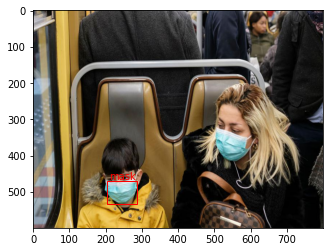

In [15]:
image = utils.read_image('test/test2.jpg')
labels, boxes, scores = model.predict_top(image)
print(labels)
print(scores)
visualize.show_labeled_image(image, boxes, labels)